In [1]:
import os
import tempfile

import scanpy as sc
import scvi
import seaborn as sns
import torch
from rich import print
from scib_metrics.benchmark import Benchmarker

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_categorical_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/docrep/decorators.py:43: SyntaxWarning: 'param_continuous_covariate_keys' is not a valid key!
  doc = func(self, args[0].__doc__, *args[1:], **kwargs)


In [2]:
import pandas as pd
ad1 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peilin_Wang_2025/scRNA_annotated.h5ad')
ad1 = ad1.copy()
ad2 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Peng_Zhang_2024/scRNA_annotated.h5ad')
ad2 = ad2.copy()
ad2
old_to_new =  {
'AT1':'Normal_Epi', 
'AT2':'Normal_Epi', 
'CD4+T':'CD4+T',
'CD8+T':'CD8+T', 
'Cancer_P1/2/3':'Malignant', 
'Cancer_P4':'Malignant', 
'Cancer_P5':'Malignant', 
'Ciliated cells':'Normal_Epi', 
'Club cells':'Normal_Epi', 
'Cycling cells':'Cycling cell', 
'DC':'DC',
'Endothelial cells':'Endothelium', 
'Epithelial cells':'Normal_Epi', 
'Fibroblasts':'Fibroblast', 
'Macrophage':'Macrophage',
'Mast cells':'Mast', 
'Memory B cells':'Memory B cell', 
'Monocytes':'Monocyte', 
'NK cells':'NK',
'Naive B cells':'Naive B cell', 
'Neutrophils':'Neutrophil', 
'Plasma cells':'Plasma', 
'pDC':'pDC'}
ad1.obs['Celltype_fine'] = (
    ad1.obs['celltype_fine']
    .map(old_to_new)
    .astype('category')
)
old_to_new ={
    'Artery':'Endothelium', 
    'CAF':'Fibroblast', 
    'CD4 T':'CD4+T', 
    'CD8 T':'CD8+T', 
    'Capillary':'Endothelium', 
    'Cycling B':'Cycling cell',
    'Cycling T':'Cycling cell', 
    'GC B':'GC B cell', 
    'ILC':'ILC', 
    'Lymphatic EC':'Endothelium', 
    'Macrophage':'Macrophage', 
    'Malignant':'Malignant',
    'Mast':'Mast', 
    'Memory B':'Memory B cell', 
    'Monocyte':'Monocyte', 
    'NK':'NK', 
    'Naive B':'Naive B cell',
    'Neutrophil':'Neutrophil',
    'Normal.Epi':'Normal_Epi', 
    'Pericyte':'Endothelium', 
    'Plasma':'Plasma', 
    'SMC':'Endothelium', 
    'Tip':'Endothelium', 
    'Treg':'Treg', 
    'Venule':'Endothelium',
    'cDC1':'DC', 
    'cDC2':'DC', 
    'mregDC':'DC', 
    'pDC':'pDC'
}
ad2.obs['Celltype_fine'] = (
    ad2.obs['major']
    .map(old_to_new)
    .astype('category')
)
ad3 = sc.read_h5ad('/home/data/sdzl14/NSCLC/SDB_integrated/SDB_integrated.h5ad')
ad3 = ad3.copy()

ad4 = sc.read_h5ad('/home/data/sdzl14/NSCLC/Tagore_S_2025/Tagore_S_2025_integrated_data.h5ad')
ad4  = ad4.copy()
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin','Celltype_fine']
ad2.obs['Pathtype'] = ad2.obs['PathType']
ad2.obs = ad2.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad2.var = pd.DataFrame(index=ad2.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad2.obsm = {}

# 删除 layers 中的额外数据层
ad2.layers = {}
ad2.uns = {}
ad2.obsp = {}
ad2

ad1.obs['Dataset'] = 'Peilin_Wang_2025'
ad1.obs = ad1.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad1.var = pd.DataFrame(index=ad1.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad1.obsm = {}

# 删除 layers 中的额外数据层
ad1.layers = {}
ad1.uns = {}
ad1.obsp = {}
ad1

keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin','cell_type_major']

ad3.obs = ad3.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad3.var = pd.DataFrame(index=ad3.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad3.obsm = {}

# 删除 layers 中的额外数据层
ad3.layers = {}
ad3.uns = {}
ad3.obsp = {}
ad3
keep_obs_columns = ['Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 
                    'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin','tumor_nontumor_finer']
ad4.obs = ad4.obs[keep_obs_columns].copy()

# 清理 var 的元数据（保留基因名，删除所有列）
ad4.var = pd.DataFrame(index=ad4.var.index)  # 仅保留基因名，删除所有列

# 删除 obsm 中的嵌入数据
ad4.obsm = {}

# 删除 layers 中的额外数据层
ad4.layers = {}
ad4.uns = {}
ad4.obsp = {}
ad4
new_var_names = pd.read_csv("/home/data/sdzl14/NSCLC/Peng_Zhang_2024/rownames.txt", usecols=[0]).iloc[:,0].values

new_var_names
ad2.var_names = new_var_names
adata = ad1.concatenate(ad2, ad3,ad4, join="inner")
adata.obs['Celltype']
malignant1 = adata[adata.obs['Celltype_fine'] == 'Malignant']
malignant2 = adata[adata.obs['tumor_nontumor_finer'] .isin([ 'Tumor','Tumor (Not Tumor)'])]
malignant3 = adata[adata.obs['cell_type_major'] =='Tumor cells']
malignant = malignant1.concatenate(malignant2,malignant3,join="inner")


/tmp/ipykernel_3532094/465486623.py:144: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = ad1.concatenate(ad2, ad3,ad4, join="inner")
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/anndata/_core/merge.py:1434: UserWarning: Only some AnnData objects have `.raw` attribute, not concatenating `.raw` attributes.
  warn(
/tmp/ipykernel_3532094/465486623.py:149: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  malignant = malignant1.concatenate(malignant2,malignant3,join="inner")


In [4]:
adata = sc.read("/home/data/sdzl14/NSCLC/zong/malignant.h5ad")

adata.layers['counts'] = malignant.X.copy()
adata = adata.copy()
adata.X.max()

np.float64(10.0)

In [30]:
adata.write_h5ad("/home/data/sdzl14/NSCLC/zong/malignant.h5ad",compression='gzip')

In [54]:
adata = sc.read_h5ad("/home/data/sdzl14/NSCLC/zong/malignant.h5ad")
adata = adata.copy()
print(adata.obs['Dataset'].value_counts())

# 将多个数据集名称放入列表中
selected_datasets = [
    'Tagore_S_2025',
    'Peng_Zhang_2024',
    'Peilin_Wang_2025',
    'Kim_Lee_2020',
    'Maynard_Bivona_2020',
    'Lambrechts_Thienpont_2018_6149v2',
    'Lambrechts_Thienpont_2018_6149v1',
    'Lambrechts_Thienpont_2018_6653',
    'Laughney_Massague_2020',
    'Travaglini_Krasnow_2020'
]

# 使用单个列表参数调用 isin()
adata = adata[adata.obs['Dataset'].isin(selected_datasets)]

print(adata.obs['Dataset'].value_counts())

Dataset
Tagore_S_2025                       140232
Peng_Zhang_2024                      37385
Peilin_Wang_2025                     14966
Kim_Lee_2020                         10657
Lambrechts_Thienpont_2018_6149v2      3414
Maynard_Bivona_2020                   2313
Laughney_Massague_2020                1069
Lambrechts_Thienpont_2018_6653         675
Travaglini_Krasnow_2020                449
Lambrechts_Thienpont_2018_6149v1       294
Vieira_Teichmann_2019                   99
UKIM-V                                  57
He_Fan_2021                             51
Goveia_Carmeliet_2020                    8
Name: count, dtype: int64

Dataset
Tagore_S_2025                       140232
Peng_Zhang_2024                      37385
Peilin_Wang_2025                     14966
Kim_Lee_2020                         10657
Lambrechts_Thienpont_2018_6149v2      3414
Maynard_Bivona_2020                   2313
Laughney_Massague_2020                1069
Lambrechts_Thienpont_2018_6653         675
Travaglini_Krasnow_2020                449
Lambrechts_Thienpont_2018_6149v1       294
Name: count, dtype: int64

In [5]:
import numpy as np

# 确保数据是原始计数且无log转换
print("adata.X是否是原始计数：", adata.X.max() == adata.X.astype(int).max())

# 检查批次信息是否完整
print("Dataset类别分布：\n", adata.obs['Dataset'].value_counts())

# 检查稀疏矩阵中的inf/NaN（使用toarray转换）
if 'counts' in adata.layers:
    counts = adata.layers['counts'].toarray()  # 转换为密集矩阵
    print("Inf值：", np.isinf(counts).sum())
    print("NaN值：", np.isnan(counts).sum())


adata.X是否是原始计数： True

Dataset类别分布：
 Dataset
Tagore_S_2025                       140232
Peng_Zhang_2024                      37385
Peilin_Wang_2025                     14966
Kim_Lee_2020                         10657
Lambrechts_Thienpont_2018_6149v2      3414
Maynard_Bivona_2020                   2313
Laughney_Massague_2020                1069
Lambrechts_Thienpont_2018_6653         675
Travaglini_Krasnow_2020                449
Lambrechts_Thienpont_2018_6149v1       294
Vieira_Teichmann_2019                   99
UKIM-V                                  57
He_Fan_2021                             51
Goveia_Carmeliet_2020                    8
Name: count, dtype: int64

Inf值： 0

NaN值： 0

In [6]:

sc.pp.highly_variable_genes(
    adata,
    flavor="seurat",
    n_top_genes=2000,
    subset=True,
    inplace=True,batch_key="Dataset")

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  dispersion = np.log(dispersion)
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:305: RuntimeWarning: invalid value encountered in log
  di

In [4]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/malignant_scANVI.h5ad')
adata = adata.copy()

In [5]:
scvi.model.SCVI.setup_anndata(adata,  batch_key="Dataset",layer='counts')

In [6]:
model = scvi.model.SCVI(adata, n_layers=3, n_latent=40, gene_likelihood="nb",dispersion='gene-batch')

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/model/_scvi.py:159: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  library_log_means, library_log_vars = _init_library_size(


In [9]:
import numpy as np
print(np.isnan(adata.X).sum())
adata.X.max()

0

np.float64(10.0)

In [10]:
adata.X.max()

np.float64(10.0)

In [7]:

model.train(max_epochs=100,batch_size=128)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A100 80GB PCIe') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bo

Epoch 100/100: 100%|██████████| 100/100 [30:18<00:00, 17.94s/it, v_num=1, train_loss_step=416, train_loss_epoch=412]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [30:18<00:00, 18.18s/it, v_num=1, train_loss_step=416, train_loss_epoch=412]


In [8]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

In [13]:
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)

/tmp/ipykernel_3532094/2529970008.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata)


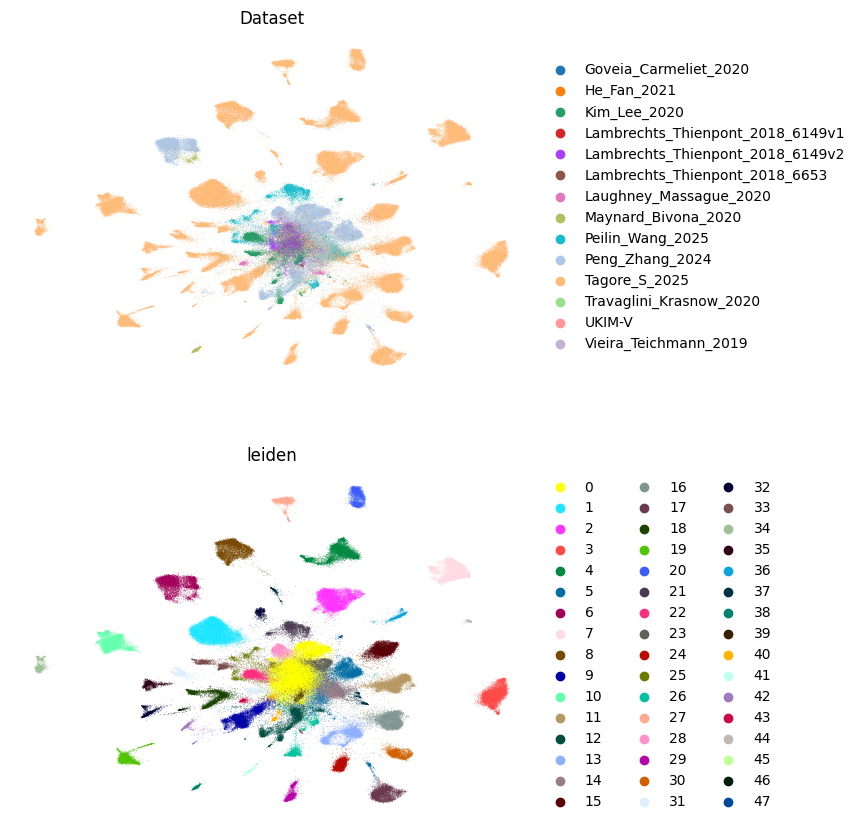

In [14]:
sc.tl.umap(adata, min_dist=0.3)
sc.pl.umap(
    adata,
    color=["Dataset", "leiden"],
    frameon=False,
    ncols=1,
)

In [15]:
adata.obs['Tissue'].cat.categories

Index(['effusion', 'normal_adjacent', 'normal_adjancent', 'normal_distant',
       'tumor_edge', 'tumor_metastasis', 'tumor_metastatis', 'tumor_middle',
       'tumor_primary'],
      dtype='object')

In [9]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="Tissue",
    unlabeled_category="tumor_primary",
)

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/model/_scanvi.py:139: UserWarning: This dataset has some empty cells, this might fail inference.Data should be filtered with `scanpy.pp.filter_cells()`
  library_log_means, library_log_vars = _init_library_size(self.adata_manager, n_batch)


In [10]:
scanvi_model.train(max_epochs=100, n_samples_per_label=100,check_val_every_n_epoch=1)

INFO     Training for 100 epochs.                                                                                  


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing 

Epoch 100/100: 100%|██████████| 100/100 [1:19:26<00:00, 49.77s/it, v_num=1, train_loss_step=369, train_loss_epoch=406]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:19:26<00:00, 47.67s/it, v_num=1, train_loss_step=369, train_loss_epoch=406]


In [11]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [14]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata, min_dist=0.05)

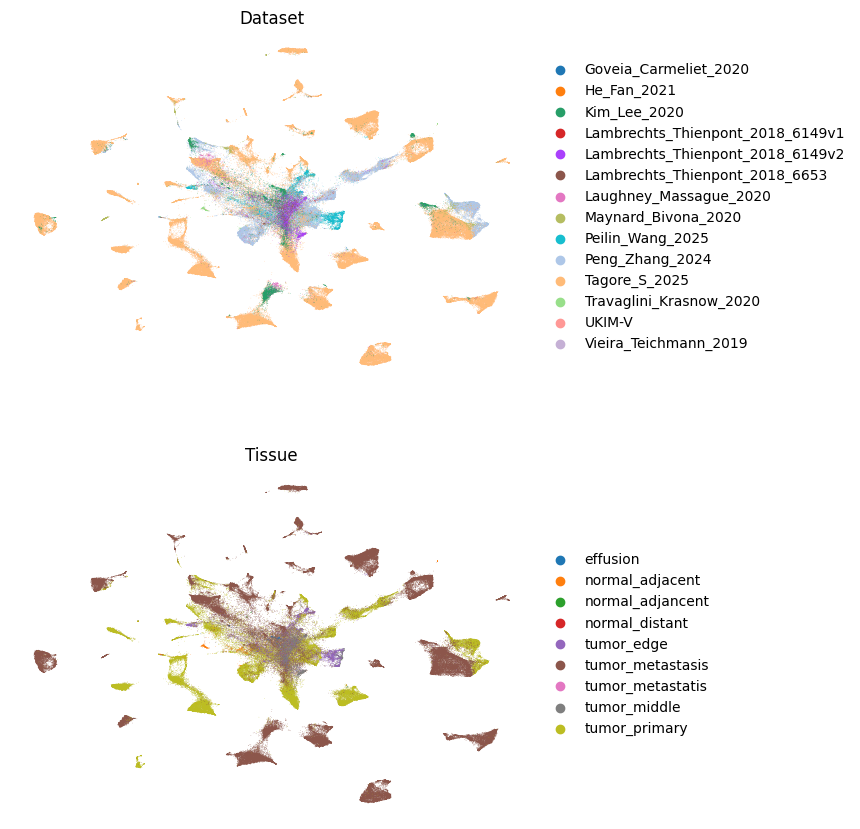

In [15]:
sc.pl.umap(
    adata,
    color=["Dataset",'Tissue'],
    frameon=False,
    ncols=1,
)

In [18]:
sc.tl.tsne(adata,n_jobs=20,early_exaggeration=6,use_rep=SCANVI_LATENT_KEY)

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scanpy/tools/_tsne.py:133: UserWarning: In previous versions of scanpy, calling tsne with n_jobs > 1 would use MulticoreTSNE. Now this uses the scikit-learn version of TSNE by default. If you'd like the old behaviour (which is deprecated), pass 'use_fast_tsne=True'. Note, MulticoreTSNE is not actually faster anymore.
  warnings.warn(


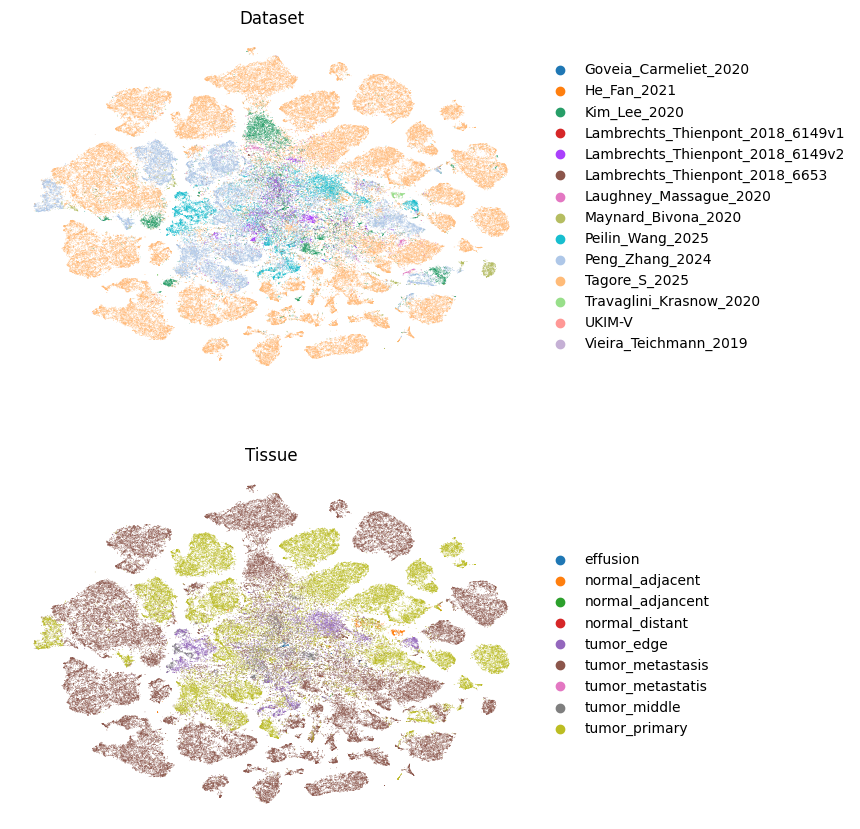

In [19]:
sc.pl.tsne( adata,
    color=["Dataset",'Tissue'],
    frameon=False,
    ncols=1,)

In [20]:
adata

AnnData object with n_obs × n_vars = 211669 × 2000
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'cell_type_major', 'tumor_nontumor_finer', 'batch', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'mean', 'std', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Dataset_colors', 'Tissue_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap', 'tsne'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_scanorama', 'X_umap', 'X_tsne'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

/tmp/ipykernel_2317152/455949634.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, key_added="leiden")


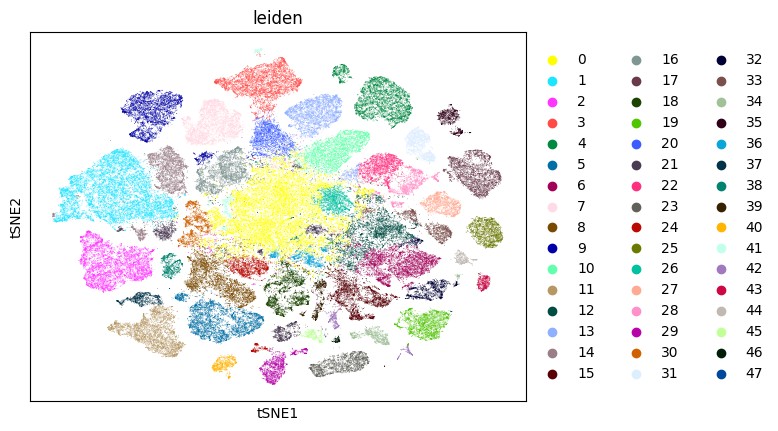

In [21]:
sc.tl.leiden(adata, key_added="leiden")
sc.pl.tsne(adata, color="leiden")

In [22]:
from scib_metrics.benchmark import Benchmarker, BioConservation
from scib_metrics.benchmark import BatchCorrection


In [24]:

# 初始化 Benchmarker
bm = Benchmarker(
    adata,
    batch_key="batch",
    label_key="Celltype_fine",
    embedding_obsm_keys=[
        "X_pca",
        SCANVI_LATENT_KEY,
        SCVI_LATENT_KEY
    ],
    n_jobs=-1
)

# 运行评估
bm.benchmark()

TypeError: Benchmarker.__init__() missing 2 required positional arguments: 'bio_conservation_metrics' and 'batch_correction_metrics'

In [ ]:
bm.plot_results_table(min_max_scale=False)

In [ ]:
df = bm.get_results(min_max_scale=False)
print(df)

In [27]:
malignant.X.max()

np.float64(4600814.0)

In [28]:
adata.write_h5ad("/home/data/sdzl14/NSCLC/zong/malignant_scANVI.h5ad")

In [30]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/immune.h5ad')
adata = adata.copy()

In [35]:
adata.obs['Celltype_fine'].value_counts()

Celltype_fine
Macrophage       53628
CD4+T            48291
Neutrophil       47457
CD8+T            40789
Memory B cell    31981
Plasma           23739
NK               19500
Monocyte         14035
Treg              7873
DC                7552
Naive B cell      6267
Mast              4900
pDC               1885
Cycling cell       811
GC B cell          579
Normal_Epi         575
Malignant          453
ILC                 75
Fibroblast          52
Endothelium         45
Name: count, dtype: int64

In [36]:

sc.pp.highly_variable_genes(
    adata,
    flavor="seurat",
    n_top_genes=2000,
    subset=True,
    inplace=True,batch_key="Dataset")

In [37]:
scvi.model.SCVI.setup_anndata(adata,  batch_key="Dataset",layer='counts')

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:187: UserWarning: Category 2 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(


In [38]:
model = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb",dispersion='gene-batch')

In [39]:
model.train(max_epochs=100,batch_size=128)

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 100/100: 100%|██████████| 100/100 [1:26:07<00:00, 57.93s/it, v_num=1, train_loss_step=459, train_loss_epoch=462]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 100/100: 100%|██████████| 100/100 [1:26:07<00:00, 51.67s/it, v_num=1, train_loss_step=459, train_loss_epoch=462]


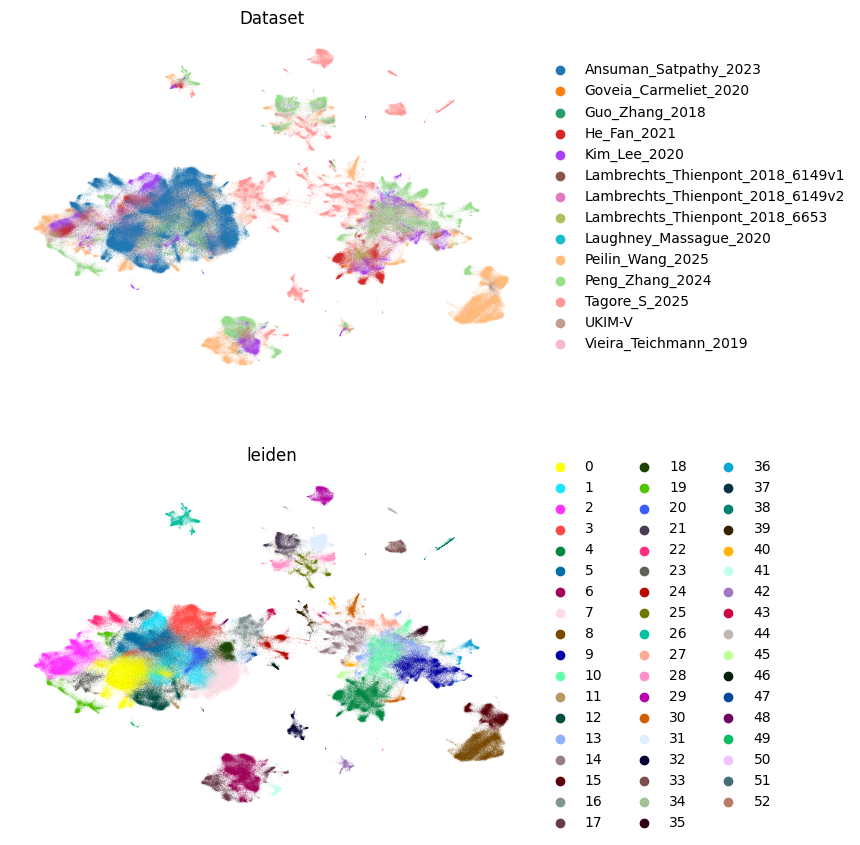

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:187: UserWarning: Category 2 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(


In [ ]:
SCVI_LATENT_KEY = "X_scVI"
adata.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()
sc.pp.neighbors(adata, use_rep=SCVI_LATENT_KEY)
sc.tl.leiden(adata)
sc.tl.umap(adata, min_dist=0.3)
sc.pl.umap(
    adata,
    color=["Dataset", "leiden"],
    frameon=False,
    ncols=1,
)
adata.obs['Tissue'].cat.categories



In [45]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata,
    labels_key="Tissue",
    unlabeled_category="Cycling cell"
)

/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/scvi/data/fields/_dataframe_field.py:187: UserWarning: Category 2 in adata.obs['_scvi_batch'] has fewer than 3 cells. Models may not train properly.
  categorical_mapping = _make_column_categorical(


In [46]:
scanvi_model.train()

INFO     Training for 4 epochs.                                                                                    


Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]
/home/data/sdzl14/anaconda3/envs/scvi-env/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=151` in the `DataLoader` to improve performance.


Epoch 4/4: 100%|██████████| 4/4 [09:56<00:00, 148.85s/it, v_num=1, train_loss_step=443, train_loss_epoch=465]

`Trainer.fit` stopped: `max_epochs=4` reached.


Epoch 4/4: 100%|██████████| 4/4 [09:56<00:00, 149.24s/it, v_num=1, train_loss_step=443, train_loss_epoch=465]


In [47]:
SCANVI_LATENT_KEY = "X_scANVI"
adata.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata)

In [54]:
adata

AnnData object with n_obs × n_vars = 755540 × 2000
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch', 'C_scANVI', '_prediction', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'C_scANVI_colors', 'Celltype_colors', 'Dataset_colors', 'Drug_colors', 'Origin_colors', 'Platform_colors', 'Timepoint_colors', 'Tissue_colors', '_prediction_colors', 'batch_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', '_scvi_uuid', '_scvi_manager_uuid', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_scanvi_fix', 'X_scanvi_fix_linear', 'X_sca

In [50]:
adata_ = scanvi_model.adata
adata_

AnnData object with n_obs × n_vars = 755540 × 2000
    obs: 'Sample', 'Patient', 'Celltype', 'Dataset', 'Platform', 'Pathtype', 'Drug', 'Timepoint', 'Tissue', 'Origin', 'Celltype_fine', 'batch', 'C_scANVI', '_prediction', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', '_scvi_batch', '_scvi_labels', 'leiden'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'C_scANVI_colors', 'Celltype_colors', 'Dataset_colors', 'Drug_colors', 'Origin_colors', 'Platform_colors', 'Timepoint_colors', 'Tissue_colors', '_prediction_colors', 'batch_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap', '_scvi_uuid', '_scvi_manager_uuid', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_scanvi_fix', 'X_scanvi_fix_linear', 'X_sca

In [55]:
adata.write_h5ad('/home/data/sdzl14/NSCLC/zong/immune_scanvi.h5ad')

In [ ]:
adata = sc.read_h5ad('/home/data/sdzl14/NSCLC/zong/immune_scanvi.h5ad')
adata = adata.copy()